# Project - Data Science Salaries

![Data Science Workflow](img/ds-workflow.png)

## Goal of project
- The goal of this project is to present insightful statistics of Data Science Salaries
- The local newspaper (or online site) want to write an article on how lucrative it is to be Data Science

## Step 1: Acquire
- Explore problem
- Identify data
- Import data

### Step 1.a: Import libraries
- Execute the cell below (SHIFT + ENTER)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Step 1.b: Read the data
- Use ```pd.read_csv()``` to read the file `files/data_science_salaries.csv`
- NOTE: Remember to assign the result to a variable (e.g., ```data```)
- Apply ```.head()``` on the data to see all is as expected
- Dataset is from **Kaggle** (Get updated dataset [here](https://www.kaggle.com/saurabhshahane/data-science-jobs-salaries))

In [2]:
data = pd.read_csv('files/data_science_salaries.csv')

In [3]:
data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2021e,EN,FT,Data Science Consultant,54000,EUR,64369,DE,50,DE,L
1,2020,SE,FT,Data Scientist,60000,EUR,68428,GR,100,US,L
2,2021e,EX,FT,Head of Data Science,85000,USD,85000,RU,0,RU,M
3,2021e,EX,FT,Head of Data,230000,USD,230000,RU,50,RU,L
4,2021e,EN,FT,Machine Learning Engineer,125000,USD,125000,US,100,US,S


### Step 1.c: Inspect the data
- Check the size of the dataset
- Can you make conclusions based on it?

In [6]:
data.size

2695

## Step 2: Prepare
- Explore data
- Visualize ideas
- Cleaning data

### Step 2.a: Check the data types
- This step tells you if some numeric column is not represented numeric.
- Get the data types by ```.dtypes```

In [7]:
data.dtypes

work_year             object
experience_level      object
employment_type       object
job_title             object
salary                 int64
salary_currency       object
salary_in_usd          int64
employee_residence    object
remote_ratio           int64
company_location      object
company_size          object
dtype: object

### Step 2.b: Check for null (missing) values
- Data often is missing entries - there can be many reasons for this
- We need to deal with that (will do later in course)
- Use ```.isnull().any()```

In [8]:
data.isnull().any()

work_year             False
experience_level      False
employment_type       False
job_title             False
salary                False
salary_currency       False
salary_in_usd         False
employee_residence    False
remote_ratio          False
company_location      False
company_size          False
dtype: bool

### Step 2.c: Understand features
- Most features has categories
- A way to categorize them is by using `data['work_year'].unique()`
- Similar for the other categories. Example:
    - `experience_level`: 
        - EN: Entry-level / Junior
        - MI: Mid-level / Intermediate
        - SE: Senior-level / Expert
        - EX: Executive-level / Director
- See full description on [Kaggle](https://www.kaggle.com/saurabhshahane/data-science-jobs-salaries)

In [9]:
data['work_year'].unique()

array(['2021e', '2020'], dtype=object)

In [10]:
data['experience_level'].unique()

array(['EN', 'SE', 'EX', 'MI'], dtype=object)

### Step 2.d: Salaries
- Notice that salaries are given in different currencies
- Also, notice `salary_in_usd`

In [11]:
data['salary_in_usd']

0       64369
1       68428
2       85000
3      230000
4      125000
        ...  
240    412000
241    151000
242    105000
243    100000
244     94917
Name: salary_in_usd, Length: 245, dtype: int64

## Step 3: Analyze
- Feature selection
- Model selection
- Analyze data

### Step 3.a: Explore features
- One way to explore features is as follows (here we explore `experience_level`)
```Python
data.groupby('experience_level')['salary_in_usd'].describe()
```
- Explore other features

In [12]:
data.groupby('experience_level')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
experience_level,,,,,,,,
EN,54.0,59753.462963,49103.427811,4000.0,21732.25,58800.5,82500.0,250000.0
EX,11.0,226288.000000,164029.405584,70329.0,114021.50,154963.0,280000.0,600000.0
MI,103.0,85738.135922,78324.468318,2876.0,40505.00,73000.0,110000.0,450000.0
SE,77.0,128841.298701,67909.763752,19052.0,78340.00,120000.0,170000.0,412000.0


In [19]:
data.groupby('company_size')['salary_in_usd'].describe()

,count,mean,std,min,25%,50%,75%,max
company_size,,,,,,,,
L,132.0,114374.015152,90822.326575,5898.0,56183.5,91500.0,150000.0,600000.0
M,55.0,85082.818182,72504.464408,4000.0,36337.5,71968.0,116062.5,450000.0
S,58.0,80874.793103,72038.848392,2876.0,35555.5,68364.5,101951.0,416000.0


### Step 3.b: Explore data on two columns
- Say you want to investigate two columns: `experience_level` and `company_size`
```Python
data.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean()
```
- Try similar for other combinations

In [13]:
data[['experience_level','company_size']]

,experience_level,company_size
0,EN,L
1,SE,L
2,EX,M
3,EX,L
4,EN,S
...,...,...
240,SE,L
241,MI,L
242,EN,S
243,EN,L


In [14]:
data.groupby(['experience_level', 'company_size'])['salary_in_usd'].mean()

experience_level  company_size
EN                L                75148.000000
                  M                41063.923077
                  S                57502.000000
EX                L               239729.875000
                  M                85000.000000
                  S               243164.500000
MI                L                96285.451613
                  M                83982.800000
                  S                47610.000000
SE                L               134465.604651
                  M               122572.125000
                  S               120978.055556
Name: salary_in_usd, dtype: float64

### Step 3.c: Describe data on two columns
- How does the spread look like.
- Can we conclude anything based on data
```Python
data.groupby(['company_size', 'experience_level'])['salary_in_usd'].describe()
```

In [15]:
data.groupby(['company_size', 'experience_level'])['salary_in_usd'].describe()

count           mean            std      min  \
company_size experience_level                                                 
L            EN                 19.0   75148.000000   64087.707409   5898.0   
             EX                  8.0  239729.875000  163591.318040  79833.0   
             MI                 62.0   96285.451613   80426.650346   6072.0   
             SE                 43.0  134465.604651   74345.888870  21843.0   
M            EN                 13.0   41063.923077   30822.672549   4000.0   
             EX                  1.0   85000.000000            NaN  85000.0   
             MI                 25.0   83982.800000   87827.739265   4000.0   
             SE                 16.0  122572.125000   51404.202382  19052.0   
S            EN                 22.0   57502.000000   39823.933768   6072.0   
             EX                  2.0  243164.500000  244426.308160  70329.0   
             MI                 16.0   47610.000000   32458.213574   2876.0   
             SE                 18.0  120978.055556   66689.351887  33511.0   

                                     25%       50%        75%       max  
company_size experience_level                                            
L            EN                 33730.50   64369.0   87000.00  250000.0  
             EX                148260.75  192481.5  257500.00  600000.0  
             MI                 46851.50   82500.0  112654.00  450000.0  
             SE                 74147.00  135000.0  174000.00  412000.0  
M            EN                 21695.00   28475.0   65561.00  100000.0  
             EX                 85000.00   85000.0   85000.00   85000.0  
             MI                 38776.00   61985.0  111775.00  450000.0  
             SE                 94552.00  117062.5  166250.00  195000.0  
S            EN                 18993.75   55660.5   88750.00  138000.0  
             EX                156746.75  243164.5  329582.25  416000.0  
             MI                 17737.25   46720.5   68300.00  110000.0  
             SE                 78110.75  108898.5  160000.00  260000.0

### Step 3.d: Visualize the description
- What does this tell you
```Python
data.boxplot(column='salary_in_usd', by='company_size')
```
- Do this for other features of your interest

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='company_size'>

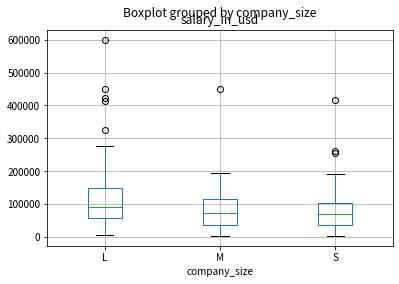

In [16]:
data.boxplot(column='salary_in_usd', by='company_size')

<AxesSubplot:title={'center':'salary_in_usd'}, xlabel='experience_level'>

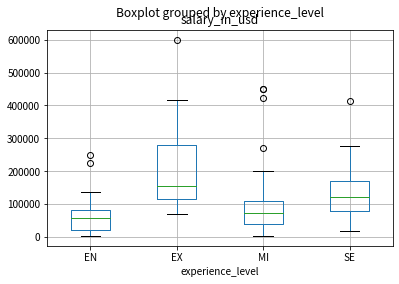

In [20]:
data.boxplot(column='salary_in_usd', by='experience_level')

## Step 4: Report
- Present findings
- Visualize results
- Credibility counts

### Step 4.a: Present your findings
- Here we focus on `company_size` and `experience_level`
- Create a data frame for the data to plot.
    - This makes easy to re-order index and column
- Notice: Do it for the features you want to present
```Python
data.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().unstack()
```
- [unstack()](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.unstack.html) unstacks multiindex

In [21]:
plot_data = data.groupby(['company_size', 'experience_level'])['salary_in_usd'].mean().unstack()
plot_data

experience_level,EN,EX,MI,SE
company_size,,,,
L,75148.000000,239729.875,96285.451613,134465.604651
M,41063.923077,85000.000,83982.800000,122572.125000
S,57502.000000,243164.500,47610.000000,120978.055556


### Step 4.b: Re-order index and columns
- We do this to present data in a logical way
- Use `reindex(index=['S', 'M', 'L'])` (assuming the same example)
- Re-order columns simply by filtering with `['EN', 'MI', 'SE', 'EX']`

In [25]:
plot_data= plot_data.reindex(index=['S', 'M', 'L'])
plot_data=plot_data[['EN', 'MI', 'SE', 'EX']]

### Step 4.c: Visualize results
- Visualize your result with a bar-plot
    - HINT: `plot.bar()`
- Finalize with title and labels

<AxesSubplot:xlabel='company_size', ylabel='USD salary'>

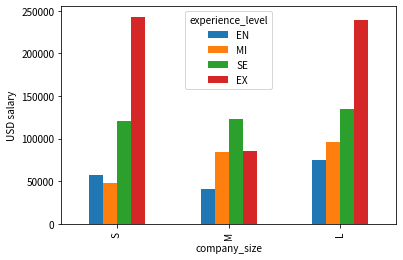

In [26]:
plot_data.plot.bar(ylabel='USD salary')

### Step 4.d: Credability considerations
- With the insights we have from our analysis - could we tell another story?
- Examples:
    - Spread of salary
    - Outliers
    - Size of dataset and categories used

## Step 5: Actions
- Use insights
- Measure impact
- Main goal

### Step 5.a:
- How could we use insights?
- How to measure it?